In [40]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Visit the Mars Temperature data site and scrape data 
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [4]:
#Assemble the scraped data into a Pandas DataFrame
mars_weather_df = df[0]
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
#Examine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [12]:
#convert terrestrial_date column to datetime datatype
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], format='%Y-%m-%d')

In [13]:
#Reexamine the data types of all the DataFrame columns
mars_weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [18]:
#How many months exist on Mars?
mars_weather_df.groupby("month").count()

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


In [26]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_weather_df.groupby("sol").count()

,id,terrestrial_date,ls,month,min_temp,pressure
sol,,,,,,
10,1,1,1,1,1,1
11,1,1,1,1,1,1
12,1,1,1,1,1,1
13,1,1,1,1,1,1
14,1,1,1,1,1,1
...,...,...,...,...,...,...
1973,1,1,1,1,1,1
1974,1,1,1,1,1,1
1975,1,1,1,1,1,1


In [84]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)
temp_df = mars_weather_df.groupby("month").mean()[['min_temp']].sort_values(by=['min_temp'])
temp_df

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


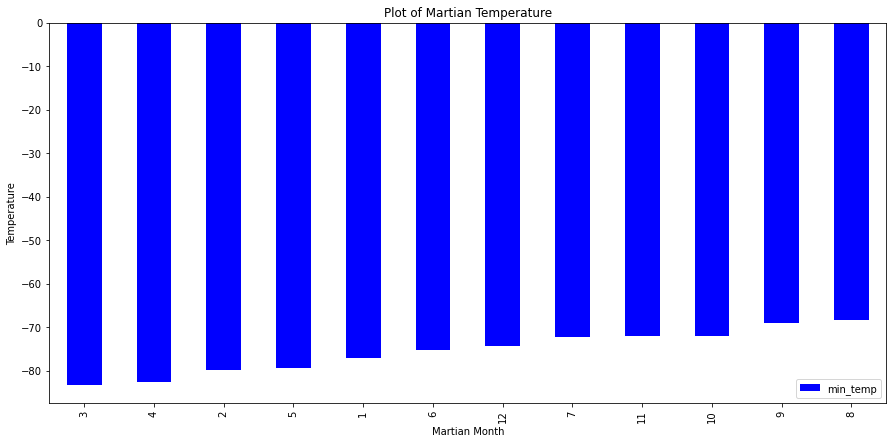

In [85]:
# Create a bar chart based off of the group series from before
temp_df_bar = temp_df.plot(kind='bar',figsize =(15,7), color = "b", title ="Plot of Martian Temperature")

# Set the xlabel and ylabel using class methods
temp_df_bar.set_xlabel("Martian Month")
temp_df_bar.set_ylabel("Temperature")

plt.show()

In [79]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
pressure_df = mars_weather_df.groupby("month").mean()[['pressure']].sort_values(by=['pressure'])
pressure_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


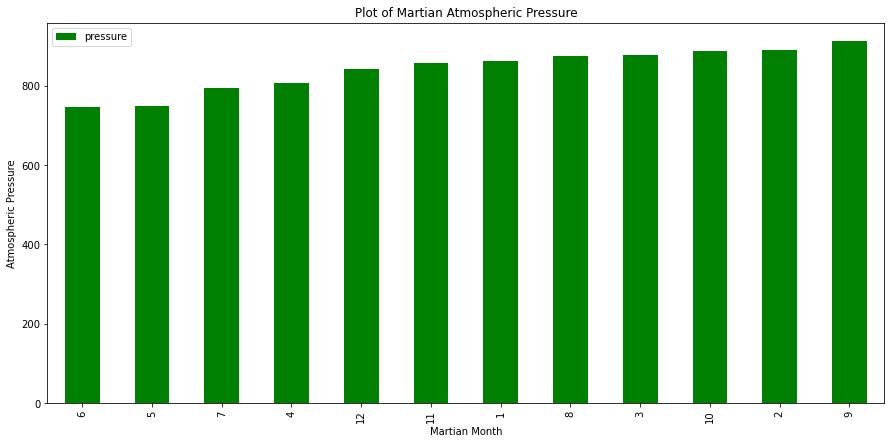

In [82]:
# Create a bar chart based off of the group series from before
pressure_df_bar = pressure_df.plot(kind='bar',figsize =(15,7), color = "g", title ="Plot of Martian Atmospheric Pressure")

# Set the xlabel and ylabel using class methods
pressure_df_bar.set_xlabel("Martian Month")
pressure_df_bar.set_ylabel("Atmospheric Pressure")

plt.show()

In [91]:
new_df = mars_weather_df.groupby("terrestrial_date").mean().sort_values(by=['terrestrial_date'])
new_df

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2.0,10.0,155.0,6.0,-75.0,739.0
2012-08-17,13.0,11.0,156.0,6.0,-76.0,740.0
2012-08-18,24.0,12.0,156.0,6.0,-76.0,741.0
2012-08-19,35.0,13.0,157.0,6.0,-74.0,732.0
2012-08-20,46.0,14.0,157.0,6.0,-74.0,740.0
...,...,...,...,...,...,...
2018-02-23,1889.0,1973.0,133.0,5.0,-78.0,730.0
2018-02-24,1892.0,1974.0,134.0,5.0,-77.0,729.0
2018-02-25,1894.0,1975.0,134.0,5.0,-76.0,729.0


In [94]:
neww_df = mars_weather_df.groupby("terrestrial_date").mean().sort_values(by=['month'])
neww_df

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2015-06-28,960.0,1028.0,4.0,1.0,-75.0,853.0
2013-08-03,323.0,353.0,1.0,1.0,-75.0,855.0
2013-08-02,319.0,352.0,0.0,1.0,-77.0,854.0
2013-08-01,320.0,351.0,0.0,1.0,-75.0,853.0
2017-05-06,1606.0,1688.0,0.0,1.0,-76.0,840.0
...,...,...,...,...,...,...
2013-07-08,296.0,327.0,347.0,12.0,-74.0,848.0
2013-07-07,295.0,326.0,347.0,12.0,-72.0,848.0
2013-07-06,294.0,325.0,346.0,12.0,-74.0,847.0


In [112]:
neww_df = mars_weather_df.groupby("terrestrial_date").count().sort_values(by=['sol'])
neww_df

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,1,1,1,1,1,1
2016-05-22,1,1,1,1,1,1
2016-05-21,1,1,1,1,1,1
2016-05-20,1,1,1,1,1,1
2016-05-19,1,1,1,1,1,1
...,...,...,...,...,...,...
2014-07-22,1,1,1,1,1,1
2014-07-21,1,1,1,1,1,1
2014-07-20,1,1,1,1,1,1


In [101]:
condition = neww_df['sol'] <= 669.6
dff = neww_df.loc[condition]
dff

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2.0,10.0,155.0,6.0,-75.0,739.0
2012-08-17,13.0,11.0,156.0,6.0,-76.0,740.0
2012-08-18,24.0,12.0,156.0,6.0,-76.0,741.0
2012-08-19,35.0,13.0,157.0,6.0,-74.0,732.0
2012-08-20,46.0,14.0,157.0,6.0,-74.0,740.0
...,...,...,...,...,...,...
2014-06-20,610.0,665.0,148.0,5.0,-78.0,735.0
2014-06-21,608.0,666.0,148.0,5.0,-77.0,736.0
2014-06-22,606.0,667.0,149.0,5.0,-76.0,736.0


In [106]:
temp = dff[['min_temp']]
temp

,min_temp
terrestrial_date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2014-06-20,-78.0
2014-06-21,-77.0
2014-06-22,-76.0


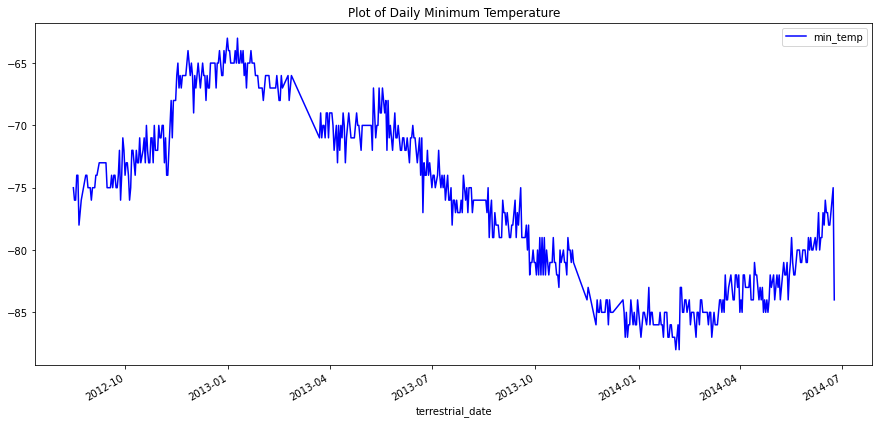

In [111]:
daily_mintemp_bar = temp.plot(kind='line',figsize =(15,7), color = "b", title ="Plot of Daily Minimum Temperature")

<AxesSubplot:>

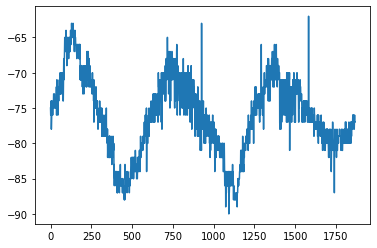

In [116]:
mars_weather_df['min_temp'].plot()

In [117]:
# Set the output file name
output_data_file = "Mars_Weather.csv"

# Export the DataFrame into a CSV file
mars_weather_df.to_csv(output_data_file)